### Hypothesis testing

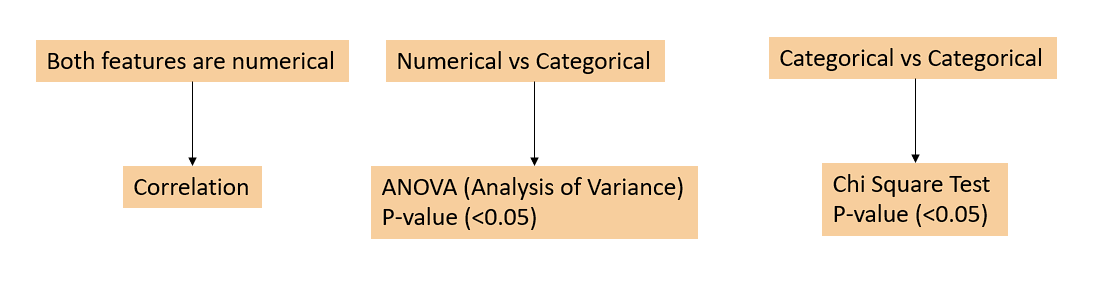

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.duplicated().sum()

1

### Seperate cat features and con features

In [6]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [7]:
cat

['sex', 'smoker', 'day', 'time']

In [8]:
con

['total_bill', 'tip', 'size']

### Understanding relationship between con vs con varibles

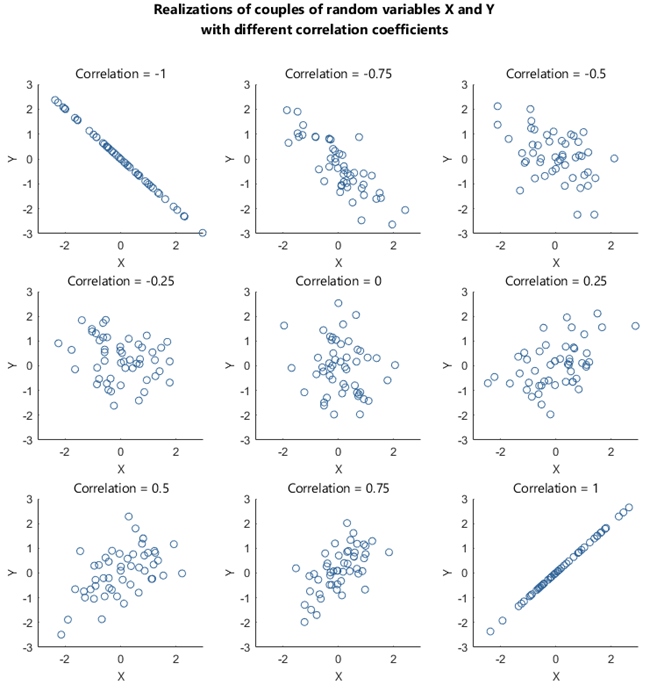

In [9]:
df[con].corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

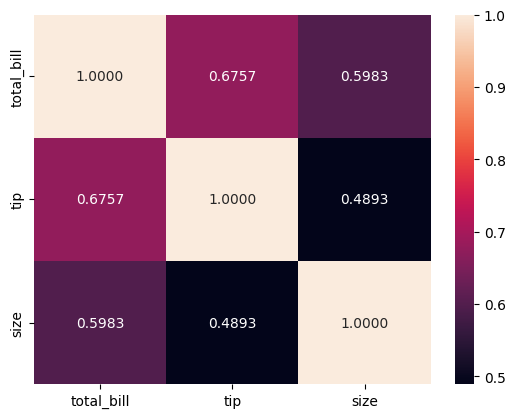

In [11]:
import seaborn as sns
sns.heatmap(df[con].corr(), annot=True, fmt='.4f')

### Understanding relationship between cat and con

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [13]:
formula = "total_bill ~ C(day)"
model = ols(formula, df).fit()

In [14]:
an = anova_lm(model)
an

,df,sum_sq,mean_sq,F,PR(>F)
C(day),3.0,643.941362,214.647121,2.767479,0.042454
Residual,240.0,18614.522721,77.560511,NaN,NaN


In [16]:
p_value = an.iloc[0, -1]
p_value

0.04245383328951916

### p_value < 0.05 hence Day and total Bill have significant relationship

In [17]:
def ANOVA(df, cat_col, con_col):
    from statsmodels.formula.api import ols
    from statsmodels.stats.anova import anova_lm
    formula = f"{con_col} ~ C({cat_col})"
    model = ols(formula, df).fit()
    an = anova_lm(model)
    p_value = an.iloc[0,-1]
    return p_value

In [18]:
ANOVA(df, 'day', 'tip')

0.17358855530405093

### Because p_value is not less than 0.05 hence day and tip are not related to each other

In [19]:
cat

['sex', 'smoker', 'day', 'time']

In [20]:
print('Relationship between total_bill vs cat features\n')
for i in cat:
    p_value = ANOVA(df, i, 'total_bill')
    print(f'Total Bill vs {i} , p_value: {p_value:.4f}')
    if p_value<=0.05:
        print(f'There is significant relationship between {i} and Total Bill')
    print('\n========================================================================\n')

Relationship between total_bill vs cat features

Total Bill vs sex , p_value: 0.0236
There is significant relationship between sex and Total Bill


Total Bill vs smoker , p_value: 0.1820


Total Bill vs day , p_value: 0.0425
There is significant relationship between day and Total Bill


Total Bill vs time , p_value: 0.0041
There is significant relationship between time and Total Bill




In [21]:
print('Relationship between tip vs cat features\n')
for i in cat:
    p_value = ANOVA(df, i, 'tip')
    print(f'Tip vs {i} , p_value: {p_value:.4f}')
    if p_value<=0.05:
        print(f'There is significant relationship between {i} and Tip')
    print('\n========================================================================\n')

Relationship between tip vs cat features

Tip vs sex , p_value: 0.1665


Tip vs smoker , p_value: 0.9266


Tip vs day , p_value: 0.1736


Tip vs time , p_value: 0.0578




### Understanding relationship between cat vs cat features - chisquare test

In [22]:
from scipy.stats import chi2_contingency

In [23]:
cat

['sex', 'smoker', 'day', 'time']

In [26]:
ctab = pd.crosstab(df['day'], df['time'])
ctab

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


In [27]:
r = chi2_contingency(ctab)
r

Chi2ContingencyResult(statistic=217.1126728434853, pvalue=8.449897551777147e-47, dof=3, expected_freq=array([[13.70491803,  5.29508197],
       [62.75409836, 24.24590164],
       [54.81967213, 21.18032787],
       [44.72131148, 17.27868852]]))

In [35]:
r[1]

8.449897551777147e-47

In [36]:
round(r[1], 4)

0.0

### Because pvalue is less than 0.05 for day and time these features have significant relationship

### Creating a function to perform chi_squared test

In [37]:
def chi2(df, cat_col1, cat_col2):
    from scipy.stats import chi2_contingency
    import pandas as pd 
    ctab = pd.crosstab(df[cat_col1], df[cat_col2])
    r = chi2_contingency(ctab)
    p_value = round(r[1],4)
    return p_value

In [38]:
cat

['sex', 'smoker', 'day', 'time']

In [39]:
chi2(df, 'smoker', 'day')

0.0

In [40]:
pd.crosstab(df['smoker'], df['day'])

day,Fri,Sat,Sun,Thur
smoker,,,,
No,4,45,57,45
Yes,15,42,19,17


### Because smoker and day have pvalue less than 0.05 then there is significant relationship between them

In [41]:
chi2(df, 'sex', 'day')

0.0042

### because p_value is less than 0.05 hence gender and day have significant relationship with each other